In [109]:
#20BHI10028 - TUSHAR MISRA
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [110]:
df.drop(['date','condition','sqft_above','sqft_basement','yr_built','yr_renovated','street','statezip','country'],axis='columns', inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,Redmond


In [111]:
target=df.city
inputs=df.drop('city',axis='columns')

In [112]:
target.head()

0    Shoreline
1      Seattle
2         Kent
3     Bellevue
4      Redmond
Name: city, dtype: object

In [113]:
inputs.columns[inputs.isna().any()]
inputs.price = inputs.price.fillna(inputs.price.mean())
inputs.bedrooms = inputs.bedrooms.fillna(inputs.bedrooms.mean())
inputs.bathrooms = inputs.bathrooms.fillna(inputs.bathrooms.mean())
inputs.sqft_living = inputs.sqft_living.fillna(inputs.sqft_living.mean())
inputs.sqft_lot = inputs.sqft_lot.fillna(inputs.sqft_lot.mean())
inputs.floors = inputs.floors.fillna(inputs.floors.mean())
inputs.waterfront = inputs.waterfront.fillna(inputs.waterfront.mean())
inputs.view = inputs.view.fillna(inputs.view.mean())

inputs.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
0,313000.0,3.0,1.50,1340,7912,1.5,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4
2,342000.0,3.0,2.00,1930,11947,1.0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0


In [114]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import train_test_split

In [115]:
import array as arr
scores=[]
i=0
t=[0.2,0.3,0.4,0.5,0.6,0.7,0.8]
for s in t:
    inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size=s, random_state=100)
    model.fit(inputs_train, target_train)
    prediction=model.predict(inputs_test)
    #accuracy using train test split
    print("Accuracy Score", accuracy_score(prediction,target_test)*100)
    scores.append(accuracy_score(prediction,target_test)*100)

Accuracy Score 33.369565217391305
Accuracy Score 33.91304347826087
Accuracy Score 33.641304347826086
Accuracy Score 34.08695652173913
Accuracy Score 33.405797101449274
Accuracy Score 33.16770186335404
Accuracy Score 33.83152173913043


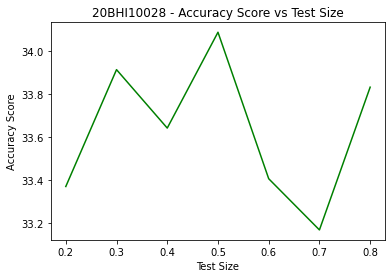

In [116]:
import matplotlib.pyplot as plt
plt.plot(t, scores, color="green")
plt.ylabel("Accuracy Score")
plt.xlabel("Test Size")
plt.title("20BHI10028 - Accuracy Score vs Test Size")
plt.show()